# Gradient descent to solve OLS

In statistical modeling and machine learning, the Ordinary Least Squares (OLS) method is a fundamental technique for linear regression. The primary objective of OLS is to find the parameters $\theta$ that minimize the sum of squared residuals, defined as
$$\mathcal{L}(\theta) = \sum_{i=1}^{n} (y_i - \mathbf{x}_i^T \theta)^2,$$

where $y_i$ denotes the observed values, $\mathbf{x}_i$ is the vector of independent variables for the $i$-th observation, and $n$ represents the total number of observations. The parameters $\theta$ are typically estimated by minimizing the loss function $\mathcal{L}(\theta)$, which measures the discrepancy between the predicted values $\mathbf{x}_i^T \theta$ and the actual observed values $y_i$. Given the quadratic nature of the loss function, it is convex, ensuring that there exists a unique global minimum that can be efficiently found using optimization techniques.

Gradient descent emerges as a powerful and widely-used iterative optimization algorithm for solving OLS problems. The central idea behind gradient descent is to utilize the gradient of the loss function with respect to the parameters, $\nabla \mathcal{L}(\theta)$, to guide the search for the optimal parameter values. Mathematically, the update rule for gradient descent can be expressed as:

$$\theta \leftarrow \theta - \eta \nabla L(\theta),$$

where $\eta$ is the learning rate, a hyperparameter that controls the step size of each update. By repeatedly applying this update rule, the algorithm incrementally approaches the optimal parameter values that minimize the loss function. The effectiveness of gradient descent lies in its ability to handle large datasets and high-dimensional feature spaces, where traditional methods, such as matrix inversion, may become computationally expensive or infeasible. As a result, gradient descent is not only a cornerstone for solving OLS problems but also serves as a foundational algorithm for a wide array of optimization challenges in machine learning.

In [7]:
from optymus.methods import steepest_descent

import matplotlib.pyplot as plt
import jax.numpy as np
import jax

We start generating a synthetic linear regression dataset using JAX's random utilities. The independent variable $x$ consists of 100 samples drawn from a uniform distribution. The dependent variable $y$ is modeled as a linear function of $x$ with a true intercept $\beta = 1.0$, slope $\alpha = 0.5$, and added noise $\sigma \cdot \epsilon$, where $\epsilon$ follows a normal distribution. This setup simulates a simple linear relationship with random variations. The generated data is visualized using a scatter plot, showing the noisy linear trend between $x$ and $y$.

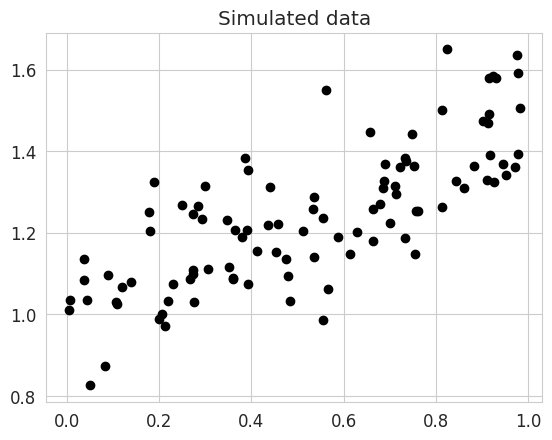

In [20]:
n = 100
key = jax.random.PRNGKey(1234)
x = jax.random.uniform(key, (n,))

alpha = 0.5 # true slope
beta = 1.0  # true intercept
sigma = 0.1  # true noise standard deviation

key, subkey = jax.random.split(key)
eps = jax.random.normal(subkey, (n,))

y = alpha * x + beta + sigma * eps

fig, ax = plt.subplots()
ax.scatter(x, y, color='black')
plt.title('Simulated data')
plt.show()

Following, we compute the parameters of a simple linear regression model, specifically the slope ($\alpha$) and intercept ($\beta$). It first calculates the mean of two input arrays, `x` and `y`, storing them in `mx` and `my`, respectively. The slope (`alpha_hat`) is then derived using the formula for the least squares estimate, which involves the covariance between `x` and `y` divided by the variance of `x`. 

Finally, the intercept (`beta_hat`) is calculated by subtracting the product of the slope and the mean of `x` from the mean of `y`, effectively setting up the linear equation $y = \alpha \cdot x + \beta$.

In [14]:
mx = x.mean()
my = y.mean()
alpha_hat = np.sum((x - mx) * (y - my)) / np.sum((x - mx)**2)
beta_hat = my - alpha_hat * mx

The result of this estimation via least squares are presented below.

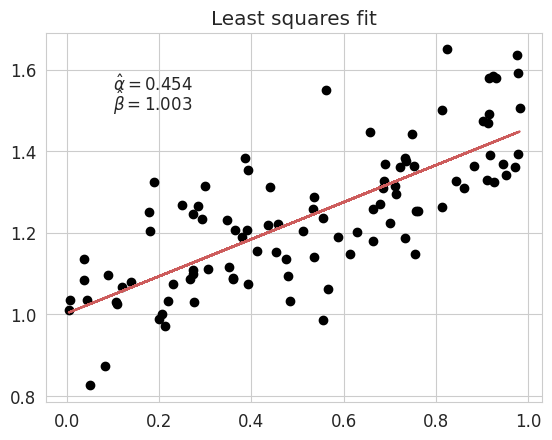

In [19]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='black')
ax.plot(x, alpha_hat * x + beta_hat, color='indianred')
ax.text(0.1, 1.55, rf'$\hat \alpha = {alpha_hat:.3f}$')
ax.text(0.1, 1.50, rf'$\hat \beta = {beta_hat:.3f}$')
plt.title('Least squares fit')
plt.show()

Now, we will implement an optimization method to estimate the coefficients. The loss function computes the sum of squared differences between the actual dependent variable $y$ and the predicted values derived from the parameters $a$ and $b$. The objective of this function is to minimize the error, a common approach in regression tasks to determine the best-fitting line through the data.

In the subsequent steps, an initial guess for the parameters $a$ and $b$ is created, initialized to zero. The dependent variable $y$ is generated based on a linear equation involving predefined constants $\alpha$, $\beta$, and noise represented by $\sigma$ and $\epsilon$. This generated data, along with the initial parameter guess, is passed to an `Optimizer` instance, which is set to use the steepest descent method for minimization. The optimization process will iteratively adjust the parameters to reduce the loss, ultimately aiming to fit the linear model to the provided synthetic data.

In [30]:
@jax.jit
def loss(params, args):
    a, b = params
    x, y = args
    return np.sum((y - a * x - b)**2)

p0 = np.zeros(2) # Initial guess for a and b
y = alpha * x + beta + sigma * eps
data = x, y

opt = steepest_descent(f_obj=loss, x0=p0, args=(data,))

alpha_hat = opt['xopt'][0].item()
beta_hat = opt['xopt'][1].item()

Steepest Descent 0:   4%|▍         | 4/100 [00:00<00:00, 119.60it/s]


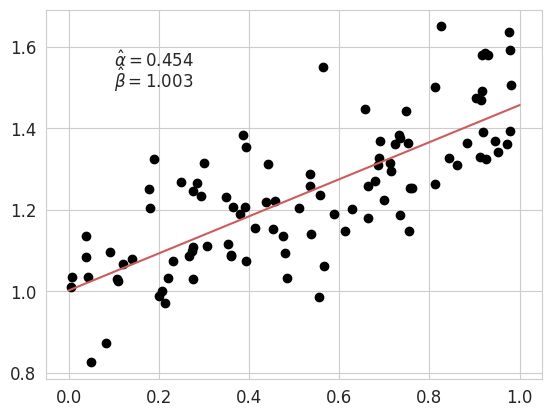

In [28]:
fig, ax = plt.subplots()
x_grid = np.linspace(0, 1, 100)
ax.scatter(x, y, color='black')
ax.plot(x_grid, alpha_hat * x_grid + beta_hat, color='indianred')
ax.text(0.1, 1.55, rf'$\hat \alpha = {alpha_hat:.3f}$')
ax.text(0.1, 1.50, rf'$\hat \beta = {beta_hat:.3f}$')
plt.show()

### Adding a squared term

Steepest Descent 0: 100%|██████████| 100/100 [00:00<00:00, 284.92it/s]


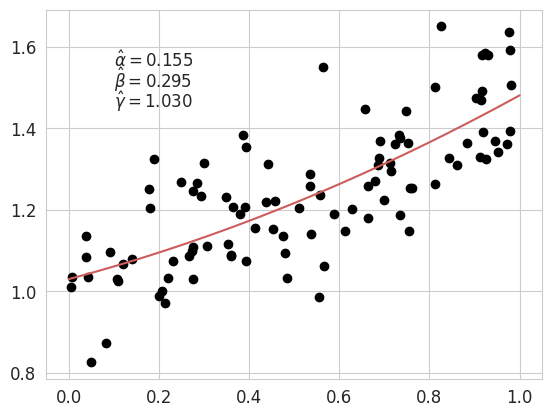

In [35]:
@jax.jit
def loss(params, data):
    a, b, c = params
    x, y = data
    return np.sum((y - a * x**2 - b * x - c)**2)

p0 = np.zeros(3)
opt = steepest_descent(f_obj=loss, x0=p0, args=(data,))

alpha_hat = opt['xopt'][0].item()
beta_hat = opt['xopt'][1].item()
gamma_hat = opt['xopt'][2].item()

fig, ax = plt.subplots()
ax.scatter(x, y, color='black')
ax.plot(x_grid, alpha_hat * x_grid**2 + beta_hat * x_grid + gamma_hat, color='indianred')
ax.text(0.1, 1.55, rf'$\hat \alpha = {alpha_hat:.3f}$')
ax.text(0.1, 1.50, rf'$\hat \beta = {beta_hat:.3f}$')
ax.text(0.1, 1.45, rf'$\hat \gamma = {gamma_hat:.3f}$')
plt.show()